In [267]:
import numpy as np
import pandas as pd
import nltk

In [268]:
df = pd.read_csv('/home/prateek/D_Drive/Tri-NIT Hackathon 3.0/ML/train.csv')

In [269]:
df.sample(5)               #Each time a new 5 sample


,Description,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping
3948,I was pinched on my a when I was returning fro...,1,0,1
1258,"When i was going to my sister place, one guy f...",0,0,0
5440,I was coming home from work and a man on the s...,0,0,0
3962,A guy was holding a chart he was intentionally...,0,0,1
2757,I was traveling through this region of India o...,1,0,1


In [270]:
df.shape

(7201, 4)

# 1) Data Cleaning

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7201 entries, 0 to 7200
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Description                        7201 non-null   object
 1   Commenting                         7201 non-null   int64 
 2   Ogling/Facial Expressions/Staring  7201 non-null   int64 
 3   Touching /Groping                  7201 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 225.2+ KB


In [272]:
#missing values
df.isnull().sum()

Description                          0
Commenting                           0
Ogling/Facial Expressions/Staring    0
Touching /Groping                    0
dtype: int64

# 2) Exploratory Data Analysis

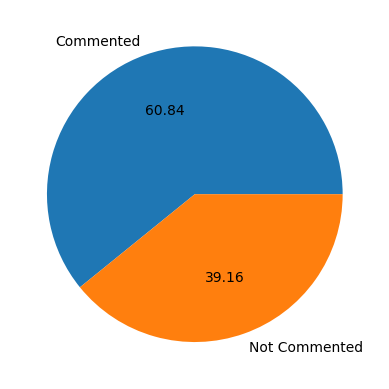

In [273]:
import matplotlib.pyplot as plt
plt.pie(df['Commenting'].value_counts(),labels=['Commented','Not Commented'],autopct='%0.2f')
plt.show()

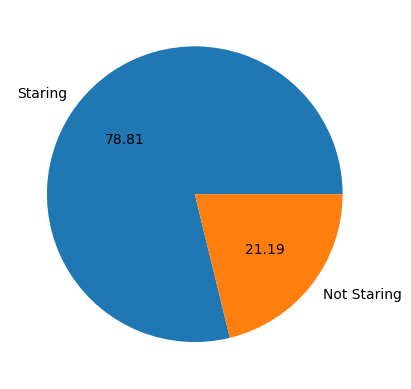

In [274]:
import matplotlib.pyplot as plt
plt.pie(df['Ogling/Facial Expressions/Staring'].value_counts(),labels=['Staring','Not Staring'],autopct='%0.2f')
plt.show()

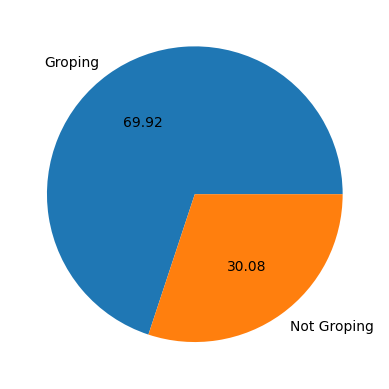

In [275]:
import matplotlib.pyplot as plt
plt.pie(df['Touching /Groping'].value_counts(),labels=['Groping','Not Groping'],autopct='%0.2f')
plt.show()

In [276]:
df['num_characters']=df['Description'].apply(len)

In [277]:
df['num_words']=df['Description'].apply(lambda x:len(nltk.word_tokenize(x)))

In [278]:
df['num_sent']=df['Description'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [279]:
df.head()

,Description,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping,num_characters,num_words,num_sent
0,"Was walking along crowded street, holding mums...",0,0,1,183,41,1
1,This incident took place in the evening.I was ...,0,1,0,89,17,1
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,1,0,0,85,20,2
3,Incident happened inside the train,0,0,0,34,5,1
4,I witnessed an incident when a chain was bruta...,0,0,0,122,22,2


In [280]:
df[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,7201.000000,7201.000000,7201.000000
mean,124.027357,25.401750,1.536592
std,190.108652,38.701803,1.761731
min,2.000000,1.000000,1.000000
25%,48.000000,10.000000,1.000000
50%,89.000000,18.000000,1.000000
75%,147.000000,30.000000,1.000000
max,6014.000000,1177.000000,78.000000


In [281]:
df[df['Commenting']==0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4381.000000,4381.000000,4381.000000
mean,132.379137,27.372746,1.604885
std,200.434310,40.955417,1.898392
min,2.000000,1.000000,1.000000
25%,52.000000,11.000000,1.000000
50%,95.000000,20.000000,1.000000
75%,158.000000,33.000000,2.000000
max,6014.000000,1177.000000,78.000000


In [282]:
df[df['Ogling/Facial Expressions/Staring']==0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,5675.000000,5675.000000,5675.000000
mean,124.603700,25.632070,1.535330
std,200.662163,40.714685,1.850495
min,4.000000,1.000000,1.000000
25%,50.000000,10.000000,1.000000
50%,90.000000,19.000000,1.000000
75%,147.000000,30.000000,1.000000
max,6014.000000,1177.000000,78.000000


In [283]:
df[df['Touching /Groping']==0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,5035.000000,5035.000000,5035.000000
mean,121.928699,24.904071,1.495730
std,185.763766,38.491976,1.829473
min,2.000000,1.000000,1.000000
25%,48.000000,10.000000,1.000000
50%,89.000000,18.000000,1.000000
75%,146.000000,30.000000,1.000000
max,5595.000000,1177.000000,78.000000


In [284]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

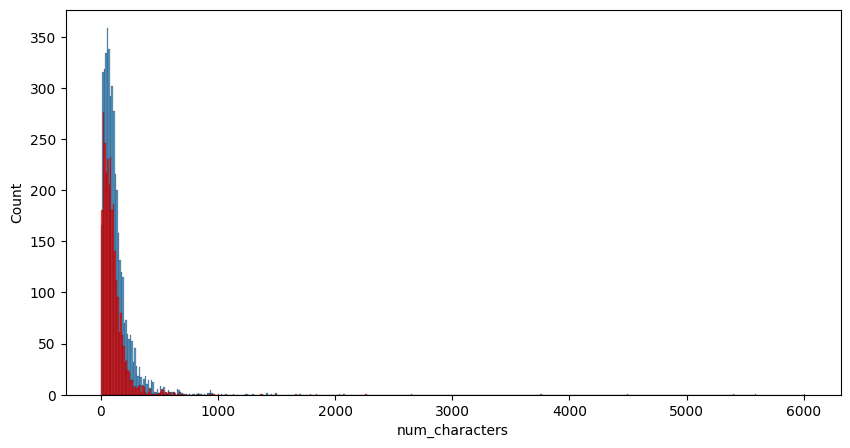

In [285]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Commenting']==0]['num_characters'])
sns.histplot(df[df['Commenting']==1]['num_characters'], color='red')

<Axes: xlabel='num_characters', ylabel='Count'>

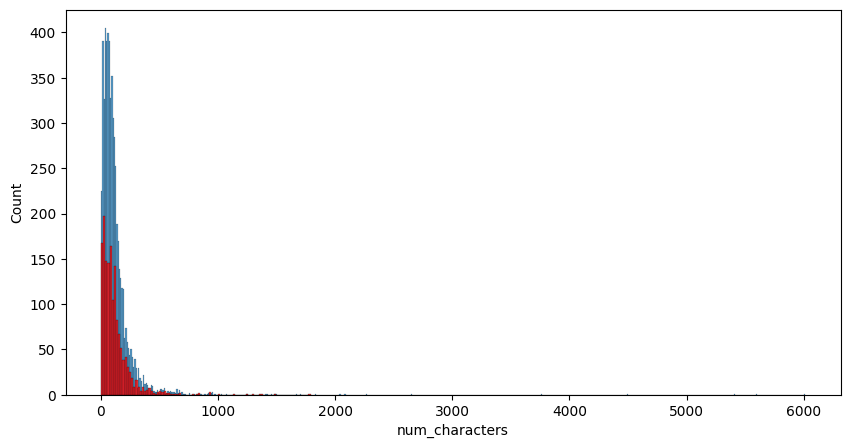

In [286]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Ogling/Facial Expressions/Staring']==0]['num_characters'])
sns.histplot(df[df['Ogling/Facial Expressions/Staring']==1]['num_characters'], color='red')

<Axes: xlabel='num_characters', ylabel='Count'>

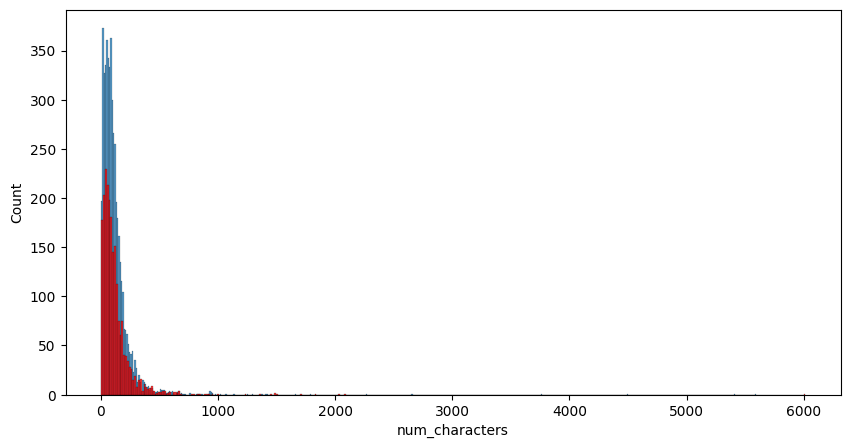

In [287]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Touching /Groping']==0]['num_characters'])
sns.histplot(df[df['Touching /Groping']==1]['num_characters'], color='red')

In [288]:
# sns.pairplot(df,hue='Commenting')

In [289]:
df[['Commenting','num_characters','num_words','num_sent']].corr()

,Commenting,num_characters,num_words,num_sent
Commenting,1.000000,-0.054761,-0.063481,-0.048320
num_characters,-0.054761,1.000000,0.994779,0.815328
num_words,-0.063481,0.994779,1.000000,0.842212
num_sent,-0.048320,0.815328,0.842212,1.000000


In [290]:
df[['Ogling/Facial Expressions/Staring','num_characters','num_words','num_sent']].corr()

,Ogling/Facial Expressions/Staring,num_characters,num_words,num_sent
Ogling/Facial Expressions/Staring,1.000000,-0.005847,-0.011477,0.001381
num_characters,-0.005847,1.000000,0.994779,0.815328
num_words,-0.011477,0.994779,1.000000,0.842212
num_sent,0.001381,0.815328,0.842212,1.000000


In [291]:
df[['Touching /Groping','num_characters','num_words','num_sent']].corr()

,Touching /Groping,num_characters,num_words,num_sent
Touching /Groping,1.000000,0.016832,0.019607,0.035366
num_characters,0.016832,1.000000,0.994779,0.815328
num_words,0.019607,0.994779,1.000000,0.842212
num_sent,0.035366,0.815328,0.842212,1.000000


<Axes: >

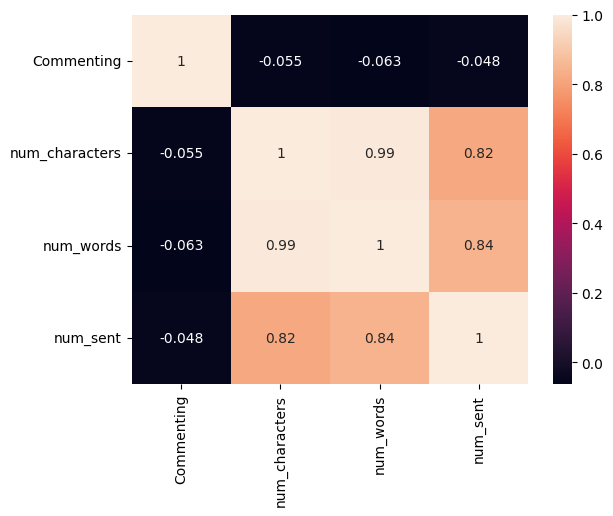

In [292]:
sns.heatmap(df[['Commenting','num_characters','num_words','num_sent']].corr(),annot=True)


<Axes: >

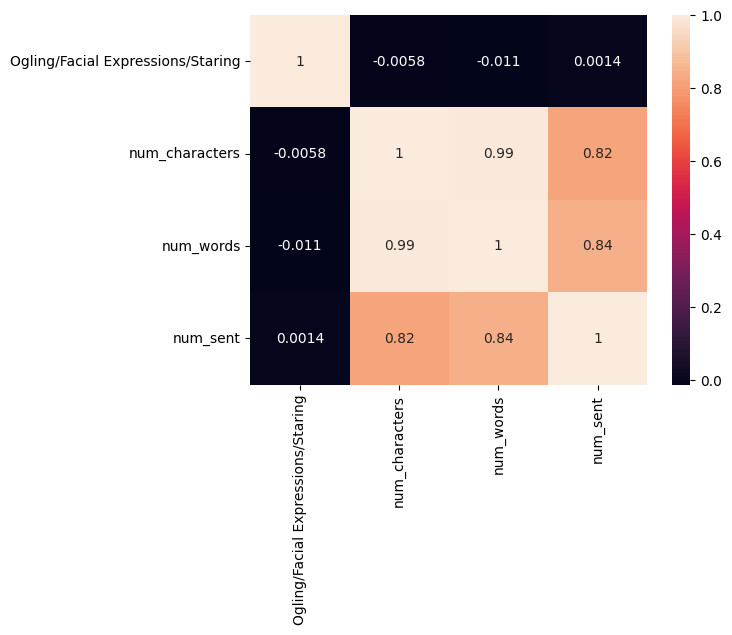

In [293]:
sns.heatmap(df[['Ogling/Facial Expressions/Staring','num_characters','num_words','num_sent']].corr(),annot=True)

<Axes: >

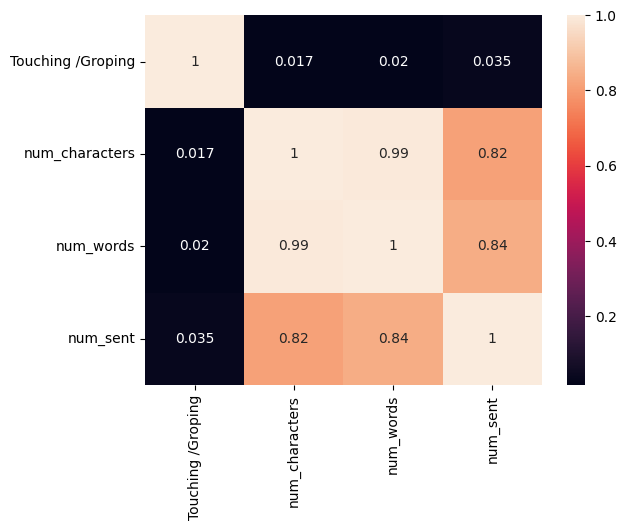

In [294]:
sns.heatmap(df[['Touching /Groping','num_characters','num_words','num_sent']].corr(),annot=True)


# 3) Data Preprocessing
- Lowercase
- Tokenisation
- Remove Special Characters
- Remove Stopwords and Punctuation
- Stemming

In [295]:
from nltk.corpus import stopwords
# nltk.download('stopwords')
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [296]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [297]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [298]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]            #Since list is a mutable datatype by text=y any change in y will be seen in text , So do text=y[:] (Clonning)
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [299]:
df['transformed_text']=df['Description'].apply(transform_text)

In [300]:
df['transformed_text'][1]

'incid took place metro two guy start stare'

In [301]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')


In [302]:
commented_yes=wc.generate(df[df['Commenting']==1]['transformed_text'].str.cat(sep=' '))
commented_no=wc.generate(df[df['Commenting']==0]['transformed_text'].str.cat(sep=' '))

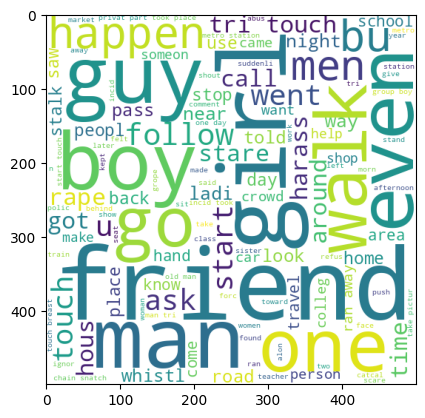

In [303]:
plt.imshow(commented_yes)

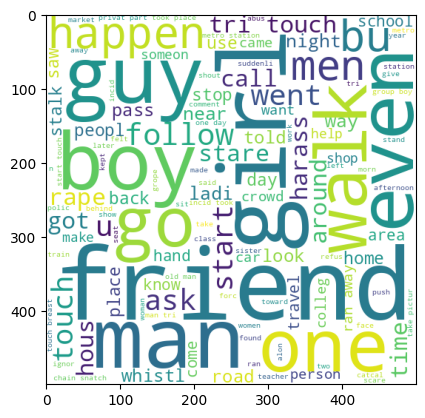

In [304]:
plt.imshow(commented_no)

In [305]:
staring_yes=wc.generate(df[df['Ogling/Facial Expressions/Staring']==1]['transformed_text'].str.cat(sep=' '))
staring_no=wc.generate(df[df['Ogling/Facial Expressions/Staring']==1]['transformed_text'].str.cat(sep=' '))

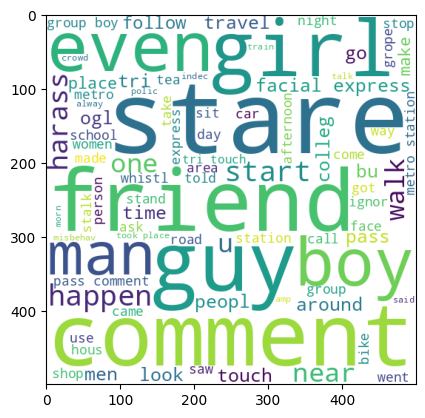

In [306]:
plt.imshow(staring_yes)

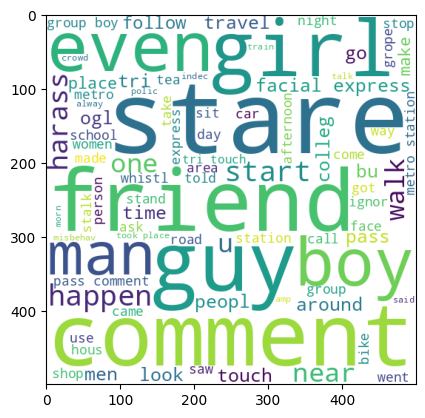

In [307]:
plt.imshow(staring_no)

In [308]:
groping_yes=wc.generate(df[df['Touching /Groping']==1]['transformed_text'].str.cat(sep=' '))
groping_no=wc.generate(df[df['Touching /Groping']==0]['transformed_text'].str.cat(sep=' '))

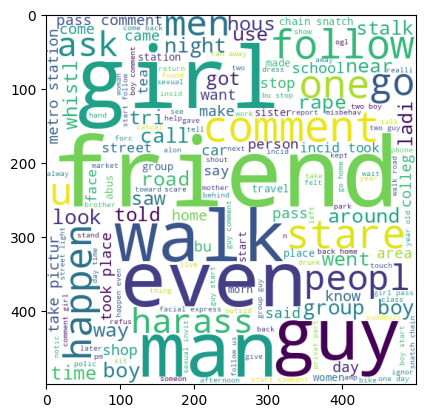

In [309]:
plt.imshow(groping_yes)

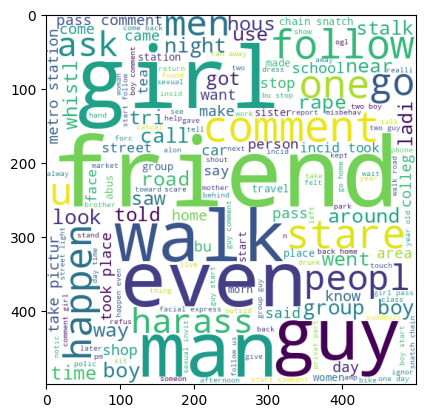

In [310]:
plt.imshow(groping_no)

In [311]:
# Top 50 words in spam and ham

corups1=[]

for msg in df[df['Commenting']==1]['transformed_text'].tolist():
    for word in msg.split():
        corups1.append(word)


In [312]:
len(corups1)

29630

In [313]:
from collections import Counter

Counter(corups1).most_common(10)

[('comment', 1327),
 ('boy', 665),
 ('pass', 513),
 ('guy', 460),
 ('girl', 441),
 ('start', 360),
 ('even', 356),
 ('friend', 345),
 ('walk', 328),
 ('group', 323)]

In [314]:
pd.DataFrame(Counter(corups1).most_common(10))

,0,1
0,comment,1327
1,boy,665
2,pass,513
3,guy,460
4,girl,441
5,start,360
6,even,356
7,friend,345
8,walk,328
9,group,323


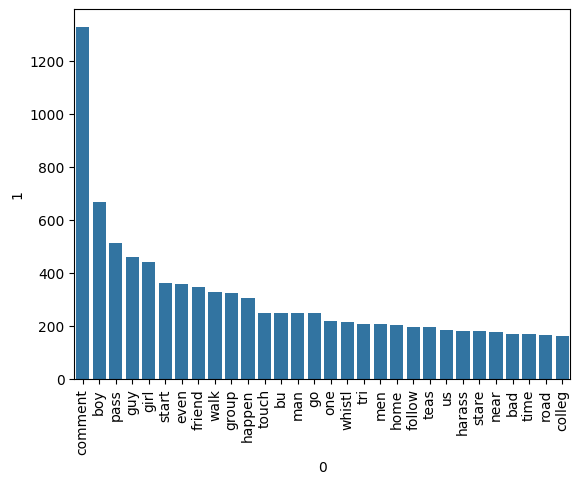

In [315]:
sns.barplot(x=pd.DataFrame(Counter(corups1).most_common(30))[0],y=pd.DataFrame(Counter(corups1).most_common(30))[1])

plt.xticks(rotation='vertical')    #Make the label vertical
plt.show()

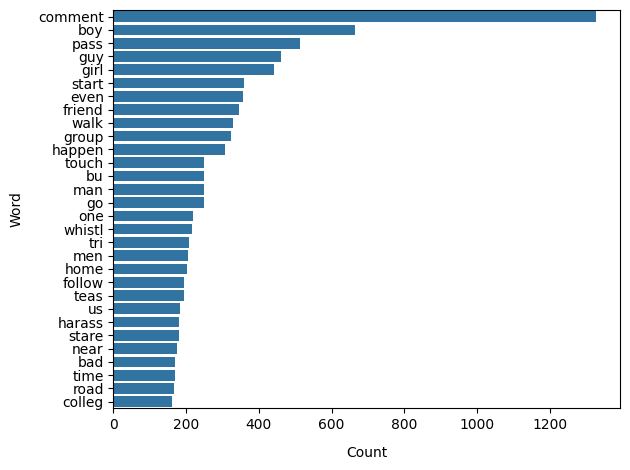

In [213]:
import seaborn as sns
import pandas as pd
from collections import Counter

# Assuming you have your corpus data in the variable "corups1"

# Create a DataFrame from the most common words and their counts
df = pd.DataFrame(Counter(corups1).most_common(30))

# Create the horizontal bar plot with Seaborn
sns.barplot(y=df[0], x=df[1], orient='h')  # Set orient='h' for horizontal orientation

# Adjust labels for clarity
plt.xlabel("Count", labelpad=10)  # Add padding for better readability
plt.ylabel("Word", labelpad=10)
plt.tight_layout()  # Adjust spacing for optimal label placement

plt.show()


In [316]:
# Top 50 words in spam and ham

corpus2=[]

for msg in df[df['Ogling/Facial Expressions/Staring']==1]['transformed_text'].tolist():
    for word in msg.split():
        corpus2.append(word)



In [317]:
len(corpus2)

17497

In [318]:
from collections import Counter

Counter(corpus2).most_common(10)

[('comment', 377),
 ('stare', 298),
 ('boy', 256),
 ('guy', 251),
 ('friend', 207),
 ('man', 200),
 ('pass', 195),
 ('even', 190),
 ('happen', 181),
 ('girl', 174)]

In [319]:
sns.barplot(x=pd.DataFrame(Counter(corups2).most_common(30))[0],y=pd.DataFrame(Counter(corups2).most_common(30))[1])

plt.xticks(rotation='vertical')    #Make the label vertical
plt.show()

KeyError: 0

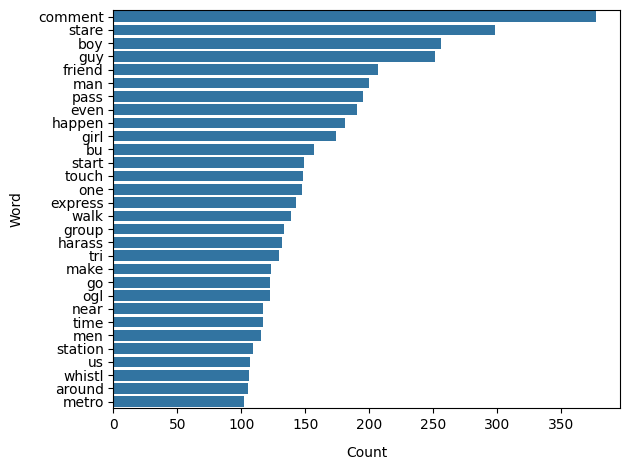

In [320]:
import seaborn as sns
import pandas as pd
from collections import Counter

# Assuming you have your corpus data in the variable "corups1"

# Create a DataFrame from the most common words and their counts
df = pd.DataFrame(Counter(corpus2).most_common(30))

# Create the horizontal bar plot with Seaborn
sns.barplot(y=df[0], x=df[1], orient='h')  # Set orient='h' for horizontal orientation

# Adjust labels for clarity
plt.xlabel("Count", labelpad=10)  # Add padding for better readability
plt.ylabel("Word", labelpad=10)
plt.tight_layout()  # Adjust spacing for optimal label placement

plt.show()


# 4.Model Building

In [88]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tf=TfidfVectorizer(max_features=3000)

In [89]:
# X=cv.fit_transform(df['transformed_text']).toarray()

X=tf.fit_transform(df['transformed_text']).toarray()

In [90]:
X.shape

(7201, 3000)

In [91]:
y=df["Touching /Groping"]

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [94]:
y_test.shape

(1441,)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [96]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gdbt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [97]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GDBT':gdbt,
    'xgb':xgb
}

In [83]:
def train_classifier(clf,X_train,y_train,X_test,y_test):

    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)

    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy

In [84]:
accuracy_score_all=[]
precision_score_all=[]

for name,clf in clfs.items():
    current_accuracy=train_classifier(clf,X_train,y_train,X_test,y_test)

    print("**************** For ",name)
    print("Accuracy = ",current_accuracy)
    # print("Precision = ",current_precision)
    
    accuracy_score_all.append(current_accuracy)
    # precision_score_all.append(current_precision)

KeyboardInterrupt: 

In [55]:
df

,Description,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping,num_characters,num_words,num_sent,transformed_text
0,"Was walking along crowded street, holding mums...",0,0,1,183,41,1,walk along crowd street hold mum hand elderli ...
1,This incident took place in the evening.I was ...,0,1,0,89,17,1,incid took place metro two guy start stare
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,1,0,0,85,20,2,wait bu man came bike offer liftvto young girl
3,Incident happened inside the train,0,0,0,34,5,1,incid happen insid train
4,I witnessed an incident when a chain was bruta...,0,0,0,122,22,2,wit incid chain brutal snatch elderli ladi inc...
...,...,...,...,...,...,...,...,...
7196,There was this person near a construction site...,0,1,0,156,30,2,person near construct site probabl labor make ...
7197,He threatened me by making inappropriate conve...,1,0,0,101,18,2,threaten make inappropri convers threaten one ...
7198,happened during morning at university metro st...,1,0,0,82,14,2,happen morn univers metro station guy comment ...
7199,one day my aunt was returniec frm office .. sh...,0,0,0,159,35,1,one day aunt returniec frm offic shaunt e foun...


In [85]:
classifiers={}

y_train
# for label in y_train.columns:
    # classifier=SVC(kernel='linear',C=1.0)
    # # classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    # # classifier=XGBClassifier(n_estimators=50,random_state=2)
    # classifier.fit(X_train,y_train[label])
    # classifiers[label]=classifier

1547    1
6632    0
2402    0
3887    0
694     1
       ..
6443    0
3606    0
5704    1
6637    0
2575    0
Name: Touching /Groping, Length: 5760, dtype: int64

In [86]:
y_pred = pd.DataFrame({label: classifier.predict(X_test) for label, classifier in classifiers.items()})

In [87]:
accuracy_score(y_test,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [1441, 0]

In [125]:
y_train

,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping
1547,0,0,1
6632,0,0,0
2402,0,0,0
3887,0,0,0
694,0,0,1
...,...,...,...
6443,1,0,0
3606,0,1,0
5704,1,0,1
6637,1,0,0


In [120]:
# Applying Stacking

estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

from sklearn.ensemble import StackingClassifier

clf_Stacking=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [121]:
clf_Stacking.fit(X_train,y_train)


StackingClassifier(estimators=[('svm', SVC(gamma=1.0, kernel='sigmoid')),
                               ('nb', MultinomialNB()),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [104]:
y_pred_stacking=clf_Stacking.predict(X_test)
print("Accuracy = ",accuracy_score(y_test,y_pred_stacking))
print("Precision = ",precision_score(y_test,y_pred_stacking))

Accuracy =  0.78764746703678
Precision =  0.7304832713754646


In [99]:
from sklearn.ensemble import VotingClassifier
voting =VotingClassifier(estimators=[('nb',mnb),('et',etc)],voting='soft')


In [100]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [101]:
y_pred_voting=voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred_voting))
print("Precision",precision_score(y_test,y_pred_voting))

Accuracy 0.8521859819569744
Precision 0.8782894736842105


In [71]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [72]:
y_pred=rfc.predict(X_test)

In [73]:
accuracy_score(y_test,y_pred)

0.7973629424011104

In [75]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('model.pkl','wb'))